### Sales Analysis 

In [67]:
# Import Python lib
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# load datafile 
df= pd.read_csv("AusApparalSales4thQrt2020.csv")

## 1. Data Wrangling

### 1.a. check missing values

In [68]:
df.isna().sum()
## result => no missing data

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

In [ ]:
df.isnull().sum()
## result => no missing data

Date     0
Time     0
State    0
Group    0
Unit     0
Sales    0
dtype: int64

### 1.b Treating missing or incorrect data

Since there was no missing data, there is no corection required.
However, for this data, since it's sales record for stores, I would drop the rows with missing data.  If it's categorical data, I would correct the data with Unknown.

In [69]:
# checking data types
df.dtypes

Date     object
Time     object
State    object
Group    object
Unit      int64
Sales     int64
dtype: object

In [ ]:
#date column is objet, convert it to date column
df['Date'] = pd.to_datetime(df['Date'])

In [71]:
df.dtypes
# The Date field has been confirmed to the correct type.

Date     datetime64[ns]
Time             object
State            object
Group            object
Unit              int64
Sales             int64
dtype: object

In [92]:
df.head

<bound method NDFrame.head of            Date        Time State     Group  Unit  Sales  log_Sales  \
0    2020-10-01     Morning    WA      Kids     8  20000   9.903488   
1    2020-10-01     Morning    WA       Men     8  20000   9.903488   
2    2020-10-01     Morning    WA     Women     4  10000   9.210340   
3    2020-10-01     Morning    WA   Seniors    15  37500  10.532096   
4    2020-10-01   Afternoon    WA      Kids     3   7500   8.922658   
...         ...         ...   ...       ...   ...    ...        ...   
7555 2020-12-30   Afternoon   TAS   Seniors    14  35000  10.463103   
7556 2020-12-30     Evening   TAS      Kids    15  37500  10.532096   
7557 2020-12-30     Evening   TAS       Men    15  37500  10.532096   
7558 2020-12-30     Evening   TAS     Women    11  27500  10.221941   
7559 2020-12-30     Evening   TAS   Seniors    13  32500  10.388995   

      norm_Sales  
0       0.105263  
1       0.105263  
2       0.032787  
3       0.260000  
4       0.016129  
...

In [72]:
# Find duplicate rows based on all columns
duplicates = df[df.duplicated(keep=False)]

# Count occurrences of each duplicate row
duplicate_counts=duplicates.groupby(list(duplicates.columns)).size().reset_index(name='count')
print(duplicate_counts)

## => result no duplicate found
## else will drop duplicate using: df.drop_duplicates()


Empty DataFrame
Columns: [Date, Time, State, Group, Unit, Sales, count]
Index: []


In [73]:
df.shape

(7560, 6)

### 1.C Choose a sutable data wrangling technique
- either data standardization or normalization. Execute the preferred normalization method and present the resulting data. 
- Normalization is the preferred approach for this problem (Min-Max or Standard normalization)

In [74]:
#  First need to plot the data to see what the data looks like

df.describe()
# Result from below shows large disperse with Sales column.  
# The column will need to be normalized.
# Will use both log and min_max scalar to check difference.

,Date,Unit,Sales
count,7560,7560.000000,7560.000000
mean,2020-11-15 04:00:00.000000256,18.005423,45013.558201
min,2020-10-01 00:00:00,2.000000,5000.000000
25%,2020-10-23 00:00:00,8.000000,20000.000000
50%,2020-11-15 12:00:00,14.000000,35000.000000
75%,2020-12-08 00:00:00,26.000000,65000.000000
max,2020-12-30 00:00:00,65.000000,162500.000000
std,NaN,12.901403,32253.506944


In [75]:
# add log_Sales column to the data frame
df['log_Sales'] = df['Sales'].apply(lambda x : np.log(x))
print('log_Sales is added to dataframe')


log_Sales is added to dataframe


In [76]:
# add norm_Sales column which normalizes the data in min max scaler technique . 

df['norm_Sales'] = ( df['Sales'] - df['Sales'].min() ) / ( df['Sales'].max() - df['Sales'] )
print('norm_Sales is  created')

norm_Sales is  created


In [77]:
# check the data
df[['Sales','log_Sales','norm_Sales']].describe()

,Sales,log_Sales,norm_Sales
count,7560.000000,7560.000000,7560.000000
mean,45013.558201,10.446010,inf
std,32253.506944,0.767054,NaN
min,5000.000000,8.517193,0.000000
25%,20000.000000,9.903488,0.105263
50%,35000.000000,10.463103,0.235294
75%,65000.000000,11.082143,0.615385
max,162500.000000,11.998433,inf


### 1.d Share your insights regarding the application of the GroupBy() function for either data chunking or merging, and offer a recommendation based on your analysis.

From the execution of the query results below:

1. The field time, has no effect on the unit sold.  The column time can be dropped.  
2. The price for every unit is 2500 regardless any other column (Date, Time, State, Group).
3. Unit is not impacted by Group.  
   - Group can be safely dropped from the data as well.
4. THe units purchased by State is very likely impacted by other factor/stats not collected here e.g.,
   - as population distribution of the state


In [78]:
df.dtypes

Date          datetime64[ns]
Time                  object
State                 object
Group                 object
Unit                   int64
Sales                  int64
log_Sales            float64
norm_Sales           float64
dtype: object

In [ ]:
# By date
gbDate=df[['Date', 'Sales']].groupby('Date').agg(total_sales=('Sales', 'sum'))
gbDate.describe()

,total_sales
count,9.000000e+01
mean,3.781139e+06
std,6.248873e+05
min,2.725000e+06
25%,3.086875e+06
50%,3.798750e+06
75%,4.428750e+06
max,4.765000e+06


In [ ]:
# By Time and Unit, Group and unit, state and unit
gbTU=df[['Time', 'Unit']].groupby('Time').agg(total_unit=('Unit', 'sum'))
print(gbTU)
gbGU=df[['Group', 'Unit']].groupby('Group').agg(total_unit=('Unit', 'sum'))
print(gbGU)
gbSU=df[['State', 'Unit']].groupby('State').agg(total_unit=('Unit', 'sum'))
print(gbSU)
# proved that time and group don't affect units, state does

           total_unit
Time                 
Afternoon       45603
Evening         44835
Morning         45683
         total_unit
Group              
Kids          34029
Men           34300
Seniors       33615
Women         34177
       total_unit
State            
NSW         29988
NT           9032
QLD         13367
SA          23543
TAS          9104
VIC         42226
WA           8861


In [ ]:
# Further looking into state , group and unit.  
gbSGU=df[['State', 'Group', 'Unit']].groupby(['State', 'Group']).agg(total_unit=('Unit', 'sum'))
print(gbSGU)
# The results shown It might due to population and group

               total_unit
State Group              
NSW   Kids           7435
      Men            7609
      Seniors        7275
      Women          7669
NT    Kids           2280
      Men            2305
      Seniors        2186
      Women          2261
QLD   Kids           3404
      Men            3357
      Seniors        3276
      Women          3330
SA    Kids           5806
      Men            5862
      Seniors        5887
      Women          5988
TAS   Kids           2310
      Men            2303
      Seniors        2260
      Women          2231
VIC   Kids          10544
      Men           10563
      Seniors       10526
      Women         10593
WA    Kids           2250
      Men            2301
      Seniors        2205
      Women          2105


In [120]:
# unit_sale
df['unit_sale']=df['Sales']/df['Unit']
df['unit_sale']
# it seems like all are 2500

0       2500.0
1       2500.0
2       2500.0
3       2500.0
4       2500.0
         ...  
7555    2500.0
7556    2500.0
7557    2500.0
7558    2500.0
7559    2500.0
Name: unit_sale, Length: 7560, dtype: float64

In [ ]:
# test by counting uniquie value
print(df['unit_sale'].nunique())
#confirmed

1


In [ ]:
# looking into total sales to see if total sales corresponds to the unit to the state
gbSS=df[['State', 'Sales']].groupby('State').agg(total_sales=('Sales', 'sum'))
print(gbSS)
# total unit from previous show below, so sales is matching
# NSW         29988
# NT           9032
# QLD         13367
# SA          23543
# TAS          9104
# VIC         42226
# WA           8861

       total_sales
State             
NSW       74970000
NT        22580000
QLD       33417500
SA        58857500
TAS       22760000
VIC      105565000
WA        22152500


## 2. Data Analysis

### 2.a.  Perform descriptive statistical analysis on the data in the Sales and Unit columns. Utilize techniques such as mean, median, mode, and standard deviation for this analysis.

In [124]:
df[['Unit', 'Sales']].describe()

,Unit,Sales
count,7560.000000,7560.000000
mean,18.005423,45013.558201
std,12.901403,32253.506944
min,2.000000,5000.000000
25%,8.000000,20000.000000
50%,14.000000,35000.000000
75%,26.000000,65000.000000
max,65.000000,162500.000000


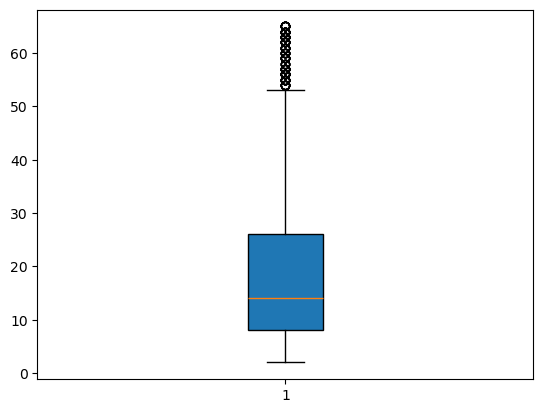

In [ ]:
# Unit box plot
plt.boxplot(df['Unit'],
            patch_artist=True           )
plt.show()

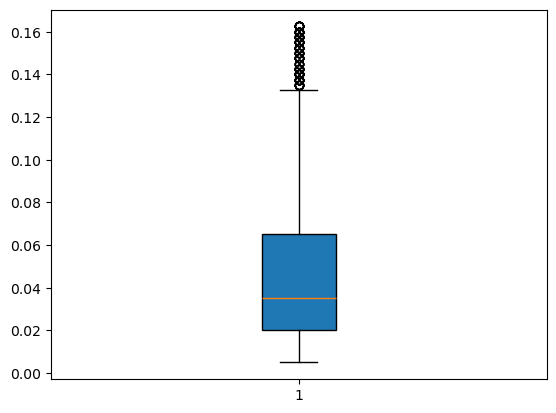

In [241]:
# Sales boxplot
plt.boxplot(df['Sales']/1000000,
            patch_artist=True           )
plt.show()

### 2.b Identify the group with the highest sales and the group with the lowest sales based on the data provided.

In [ ]:
gbGS=df[['Group', 'Sales']].groupby('Group').agg(total_Sales=('Sales', 'sum'))
# print(gbGS)
# group with highest sales is Men, lowest is Seniors
print(f"Maxinum group is {gbGS.idxmax()[0]} and minumum group is {gbGS.idxmin()[0]}")


         total_Sales
Group               
Kids        85072500
Men         85750000
Seniors     84037500
Women       85442500
Maxinum group is  Men and minumum group is  Seniors


/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/1514358538.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maxinum group is {gbGS.idxmax()[0]} and minumum group is {gbGS.idxmin()[0]}")


### 2.c. Identify the group with the highest and lowest sales based on the data provided.

In [143]:
# same as above - duplicate question
print(f"Maxinum group is {gbGS.idxmax()[0]} and minumum group is {gbGS.idxmin()[0]}")


Maxinum group is  Men and minumum group is  Seniors


/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/2970745118.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(f"Maxinum group is {gbGS.idxmax()[0]} and minumum group is {gbGS.idxmin()[0]}")


### 2.d Generate weekly, monthly, and quarterly reports to document and present the results of the analysis conducted. (Use suitable libraries such as NumPy, Pandas, and SciPy for performing the analysis.)

In [157]:
# gbGS=df[['Group', 'Sales']].groupby('Group').agg(total_Sales=('Sales', 'sum'))
gbDS=df[['Date','Sales']]
gbDS.set_index('Date', inplace=True)
gbDS.resample('W').agg(total_Sales=('Sales', 'sum'))


,total_Sales
Date,
2020-10-04,15045000
2020-10-11,27002500
2020-10-18,26640000
2020-10-25,26815000
2020-11-01,21807500
2020-11-08,20865000
2020-11-15,21172500
2020-11-22,21112500
2020-11-29,21477500


In [158]:
gbDS.resample('M').agg(total_Sales=('Sales', 'sum'))

/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/3107166213.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  gbDS.resample('M').agg(total_Sales=('Sales', 'sum'))


,total_Sales
Date,
2020-10-31,114290000
2020-11-30,90682500
2020-12-31,135330000


In [159]:
gbDS.resample('Q').agg(total_Sales=('Sales', 'sum'))

/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/3556695687.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  gbDS.resample('Q').agg(total_Sales=('Sales', 'sum'))


,total_Sales
Date,
2020-12-31,340302500


## 3. Data visualization

### 3.a. 
Use suitable data visualization libraries to construct a dashboard for the head of sales and marketing. The dashboard should encompass key parameters:
- State-wise sales analysis for different demographic groups (kids, women, men, and seniors).
- Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
- Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams. This information aids in designing programs like hyper-personalization and Next Best Offers to enhance sales.

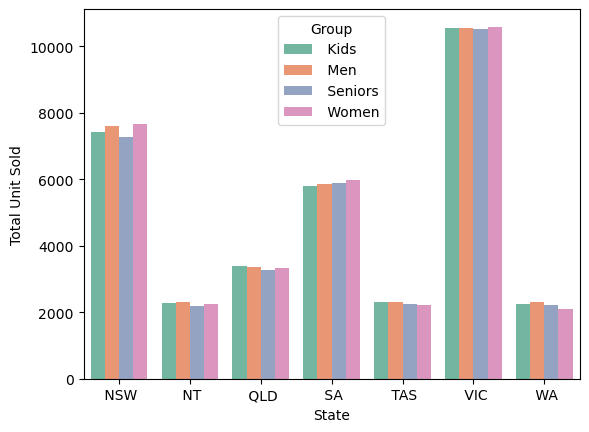

In [164]:
# State-wise sales analysis for different demographic groups (kids, women, men, and seniors)
gbSGU=df[['State', 'Group', 'Unit']].groupby(['State', 'Group']).agg(total_unit=('Unit', 'sum'))
# print(gbSGU)
ax=sns.barplot(data=gbSGU, x='State', y='total_unit', hue='Group', palette='Set2')
ax.set_ylabel('Total Unit Sold')
plt.show()

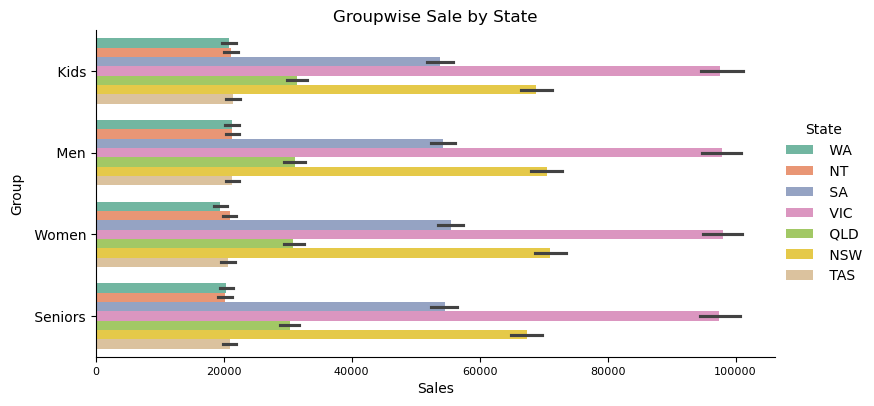

In [173]:
# Group-wise sales analysis (Kids, Women, Men, and Seniors) across various states.
GSS=df[['Group', 'State','Sales']]
sns.catplot(GSS, y='Group', x='Sales',
            kind = 'bar',
            height=4,
            aspect=2,       # width = height * asect
            hue='State',
            palette='Set2'
           )
plt.xticks(fontsize=8)
plt.title('Groupwise Sale by State')
plt.show()

In [223]:
# Group sale by day 
TS=df[['Date','Group', 'Sales']]
TS['Sales']=TS['Sales']/1000
TS.set_index('Date', inplace=True)
TS_DGS=TS.groupby([pd.Grouper(freq='D')]).agg(total_sale=('Sales', 'sum'))
TS_DGS

/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/1045685113.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS['Sales']=TS['Sales']/1000


,total_sale
Date,
2020-10-01,3720.0
2020-10-02,3715.0
2020-10-03,3890.0
2020-10-04,3720.0
2020-10-05,3862.5
...,...
2020-12-26,4715.0
2020-12-27,4637.5
2020-12-28,4595.0


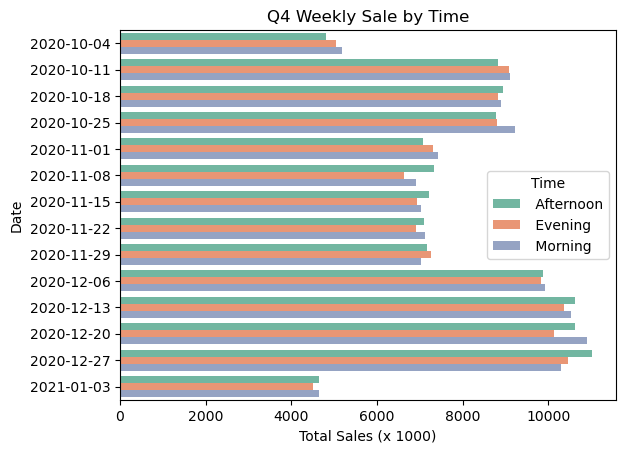

In [220]:
# - Time-of-the-day analysis: Identify peak and off-peak sales periods to facilitate strategic planning for S&M teams.
# Time Sales

ax=sns.barplot(data=TS_GR, y='Date', x='total_sale', hue='Time', palette='Set2')
ax.set_xlabel('Total Sales (x 1000)')
ax.set_title("Q4 Weekly Sale by Time")
plt.show()

/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/175933453.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  TS_GR=TS.groupby([pd.Grouper(freq='M'), 'Time']).agg(total_sale=('Sales', 'sum'))


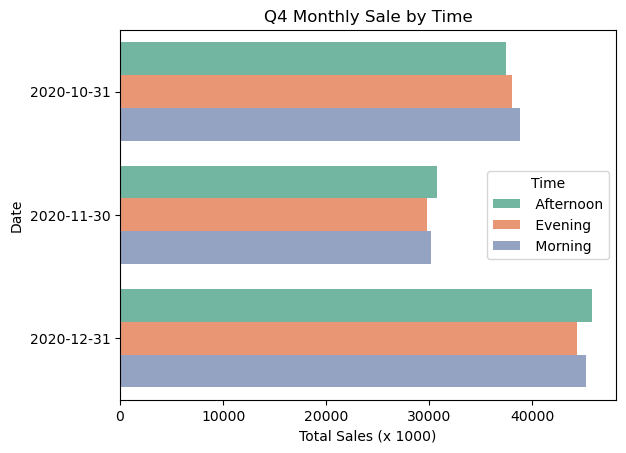

In [221]:
TS_GR=TS.groupby([pd.Grouper(freq='M'), 'Time']).agg(total_sale=('Sales', 'sum'))
ax=sns.barplot(data=TS_GR, y='Date', x='total_sale', hue='Time', palette='Set2')
ax.set_xlabel('Total Sales (x 1000)')
ax.set_title("Q4 Monthly Sale by Time")
plt.show()

/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/3131763106.py:1: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  TS_GR=TS.groupby([pd.Grouper(freq='Q'), 'Time']).agg(total_sale=('Sales', 'sum'))


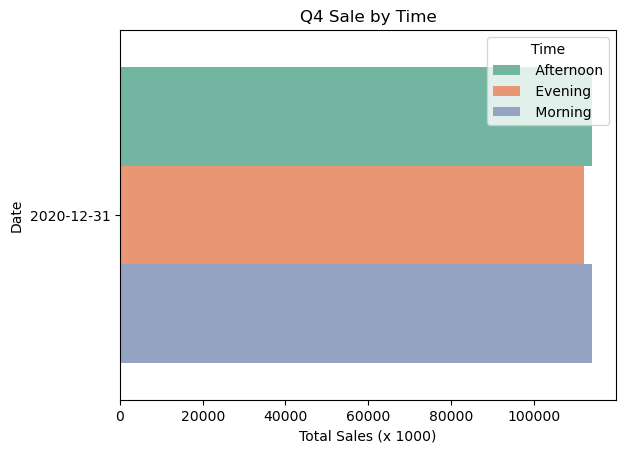

In [222]:
TS_GR=TS.groupby([pd.Grouper(freq='Q'), 'Time']).agg(total_sale=('Sales', 'sum'))
ax=sns.barplot(data=TS_GR, y='Date', x='total_sale', hue='Time', palette='Set2')
ax.set_xlabel('Total Sales (x 1000)')
ax.set_title("Q4 Sale by Time")
plt.show()

/var/folders/yj/9pscqydd39q_bptwmd1n8jx80000gn/T/ipykernel_4745/2396794526.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TS['Sales']=TS['Sales']/1000


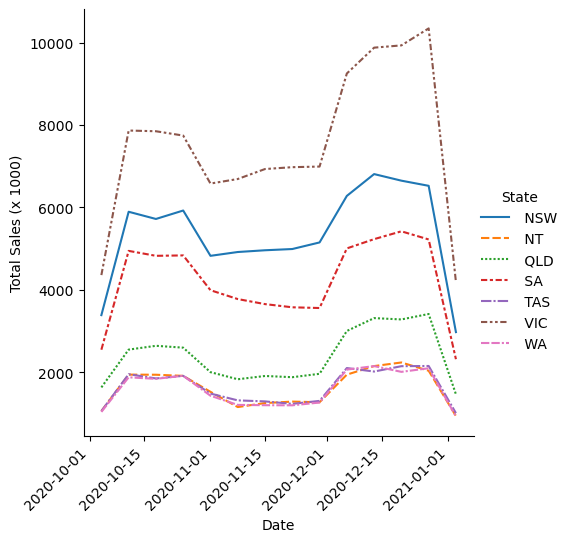

In [238]:
# TS=df[['Date','Time', 'Sales']].groupby(['Date', 'Time']).agg(total_sale=('Sales', 'sum'))
TS=df[['Date','State','Sales']]
TS['Sales']=TS['Sales']/1000
TS.set_index('Date', inplace=True)
TS_DSS=TS.groupby([pd.Grouper(freq='W'), 'State' ]).agg(total_sale=('Sales', 'sum'))
TS_DSS

sns.relplot(TS_DSS, x='Date',y='total_sale',
            kind ='line',
            hue='State',
            style='State'
           )
plt.ylabel('Total Sales (x 1000)')
plt.xticks(rotation=45, ha='right')
plt.show()

### 3.b Ensure the visualization is clear and accessible for effective decision-making by the head of sales and marketing (S&M).
The dashboard must contain daily, weekly, monthly, and quarterly charts.
(Any visualization library can be used for this purpose. However, since statistical analysis is being done, Seaborn is preferred.)

### 3.c.

Include your recommendation and indicate why you are choosing the recommended visualization package.

Bar charts are picked because there's no actual time is recorded.  The line graph is used to show overall sales. 

## 4. Report generation

### 4.a

Use JupyterLab Notebook for generating reports, which includes tasks such as data wrangling, analysis, and visualization. Please note that JupyterLab enables you to integrate code seamlessly with graphs and plots


### 4.b
Use Markdown in suitable places while presenting your report. 

### 4.c
Use suitable graphs, plots, and analysis reports in the report, along with recommendations. Note that various aspects of analysis require different graphs and plots.
- Use a box plot for descriptive statistics.
- Use the Seaborn distribution plot for any other statistical plotting.